In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error



# Chargement des données

In [24]:
data_march = pd.read_csv('listings.csv')
data_december = pd.read_csv('listings (1).csv')
data_september = pd.read_csv('listings (2).csv')
data= pd.concat([data_march,data_december,data_september])

In [25]:
data.isnull().mean().sort_values(ascending=False).sum() * 100

998.0460409056418

In [26]:
data.columns


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [27]:
data_march.columns.tolist()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'source',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availability',
 'availability_30

In [28]:
# data.values.tolist()
# data.to_numpy()

In [29]:
# data.sort_values(ascending=False, by='beds')

# Supprimer les symboles de devise et convertir en flottant

In [30]:
data_march['price'] = data_march['price'].replace('[\$,]', '', regex=True).astype(float)
data_december['price'] = data_december['price'].replace('[\$,]', '', regex=True).astype(float)
data_september['price'] = data_september['price'].replace('[\$,]', '', regex=True).astype(float)

data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)


# Supprimer les espaces avant et après les noms de colonnes

In [31]:

data.columns.str.strip()

# Sélection des colonnes pertinentes

In [32]:

# Index des colonnes
column_index = ['latitude', 'longitude', 'accommodates', 'bedrooms', 'bathrooms', 'property_type', 'room_type', 'amenities', 'price']

# Sélection des colonnes pertinentes dans les données
data = data[column_index]


# Gestion des valeurs manquantes

In [33]:
numerical_columns = ['accommodates', 'bedrooms', 'bathrooms']  # Colonnes numériques
# Création de l'imputeursimple
imputer = SimpleImputer(strategy='median')

# Ajuster l'imputeursimple aux données d'apprentissage
imputer.fit(data_march[numerical_columns])

# Appliquer l'imputeursimple aux données
data[numerical_columns] = imputer.transform(data[numerical_columns])

In [34]:
# numerical_columns = ['accommodates', 'bedrooms', 'bathrooms']  # Colonnes numériques
# imputer = SimpleImputer(strategy='median')
# data_march[numerical_columns] = imputer.fit_transform(data_march[numerical_columns])
# data_december[numerical_columns] = imputer.transform(data_december[numerical_columns])
# data_september[numerical_columns] = imputer.transform(data_september[numerical_columns])

# data[numerical_columns] = imputer.transform(data[numerical_columns])

# Remplacer les valeurs manquantes dans les colonnes non numériques par 0

In [35]:
data_march = data_march.fillna(0)
data_december = data_december.fillna(0)
data_september = data_september.fillna(0)

data = data.fillna(0)

# Séparation des données en ensembles d'entraînement et de test

In [36]:
# X_train_march, X_test_march, y_train_march, y_test_march = train_test_split(data_march.drop('price', axis=1), data_march['price'], test_size=0.2, random_state=42)
# X_train_december, X_test_december, y_train_december, y_test_december = train_test_split(data_december.drop('price', axis=1), data_december['price'], test_size=0.2, random_state=42)
# X_train_september, X_test_september, y_train_september, y_test_september = train_test_split(data_september.drop('price', axis=1), data_september['price'], test_size=0.2, random_state=42)

# X_train, X_test, y_train, y_test = train_test_split(data.drop('price', axis=1), data['price'], test_size=0.2, random_state=42)
# Séparation des données en ensembles d'entraînement et de test
# Sélection des colonnes pertinentes dans les données concaténées
# Colonnes pertinentes pour l'analyse



# Traitement des données catégorielles (one-hot encoding)
data = pd.get_dummies(data, columns=['property_type', 'room_type'])


X_train, X_test, y_train, y_test = train_test_split(data.drop('price', axis=1), data['price'], test_size=0.2, random_state=42)

In [37]:
# data.describe()

# Entraînement des modèles de régression linéaire pour chaque période

In [38]:
# non_numeric_columns = data.select_dtypes(exclude=['float64', 'int64']).columns
# print(non_numeric_columns)


In [39]:
# Initialisation du modèle de régression linéaire
model = LinearRegression()

# Entraînement du modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

ValueError: could not convert string to float: '[]'

# Régression linéaire simple pour Mars  Décembre Septembre

In [ ]:
# Régression linéaire simple pour  Septembre Décembre Mars
model_simple = LinearRegression()
model_simple.fit(X_train[['accommodates']], y_train)
predictions_simple = model_simple.predict(X_test[['accommodates']])
mse_simple = mean_squared_error(y_test, predictions_simple)
print("MSE Mars (Régression Linéaire Simple) :", mse_simple)


MSE Mars (Régression Linéaire Simple) : 273738.72602805245
MSE Décembre (Régression Linéaire Simple) : 622520.9759939293
MSE Septembre (Régression Linéaire Simple) : 146778.99336274865
MSE Mars (Régression Linéaire Simple) : 235602.17449197147


# Combinaison des données des trois périodes

In [ ]:

# all_data = pd.concat([data_march, data_december, data_september], ignore_index=True)

# # Séparation des données combinées en ensembles d'entraînement et de test
# X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(all_data.drop('price', axis=1), all_data['price'], test_size=0.2, random_state=42)

# # Régression linéaire simple pour l'ensemble combiné
# model_all_simple = LinearRegression()
# model_all_simple.fit(X_train_all[['accommodates']], y_train_all)
# predictions_all_simple = model_all_simple.predict(X_test_all[['accommodates']])
# mse_all_simple = mean_squared_error(y_test_all, predictions_all_simple)
# print("MSE pour les trois périodes combinées (Régression Linéaire Simple) :", mse_all_simple)

# Entraînement et évaluation des modèles pour chaque période

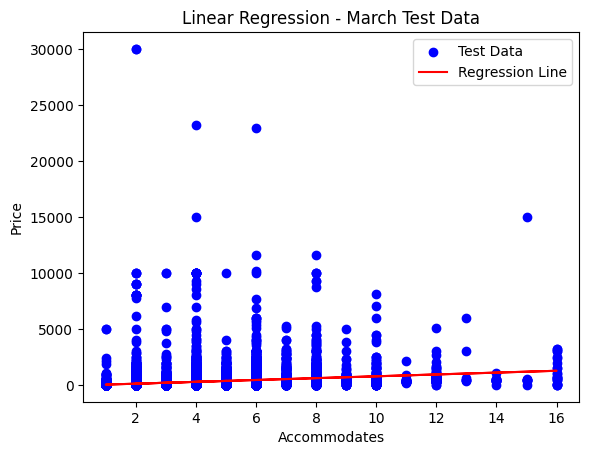

In [ ]:
plt.scatter(X_test['accommodates'], y_test, color='blue', label='Test Data')
plt.plot(X_test['accommodates'], predictions_simple, color='red', label='Regression Line')
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.title('Linear Regression - March Test Data')
plt.legend()
plt.show()

plt.show()

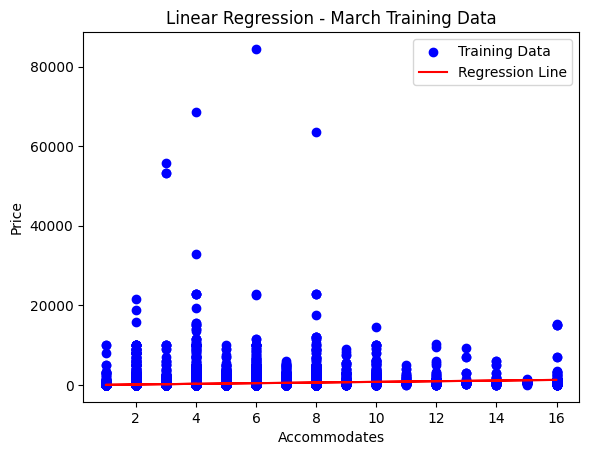

In [ ]:
plt.scatter(X_train['accommodates'], y_train, color='blue', label='Training Data')
plt.plot(X_train['accommodates'], model_simple.predict(X_train[['accommodates']]), color='red', label='Regression Line')
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.title('Linear Regression - March Training Data')
plt.legend()
plt.show()



In [ ]:
# plt.scatter(X_train_all['accommodates'], y_train_all, color='blue', label='Training Data')
# plt.plot(X_train_all['accommodates'], model_all_simple.predict(X_train_all[['accommodates']]), color='red', label='Regression Line')
# plt.xlabel('Accommodates')
# plt.ylabel('Price')
# plt.title('Linear Regression - Combined Training Data')
# plt.legend()
# plt.show()


In [ ]:
# plt.scatter(X_test_all['accommodates'], y_test_all, color='blue', label='Test Data')
# plt.plot(X_test_all['accommodates'], predictions_all_simple, color='red', label='Regression Line')
# plt.xlabel('Accommodates')
# plt.ylabel('Price')
# plt.title('Linear Regression - Combined Test Data')
# plt.legend()
# plt.show()

# Calcul des pourcentages d'erreurs quadratiques moyennes pour chaque modèle

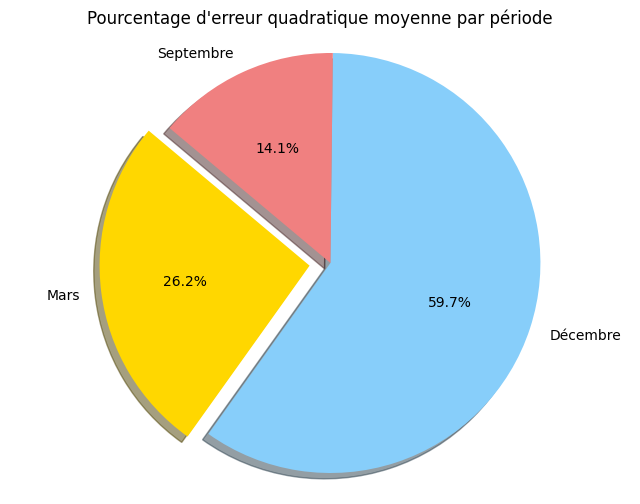

In [ ]:
# Calcul des pourcentages d'erreurs quadratiques moyennes pour chaque modèle
# total_error = mse_march_simple + mse_december_simple + mse_september_simple
# percentage_march = mse_march_simple / total_error * 100
# percentage_december = mse_december_simple / total_error * 100
# percentage_september = mse_september_simple / total_error * 100

# # Création du diagramme en pourcentage rond
# labels = ['Mars', 'Décembre', 'Septembre']
# sizes = [percentage_march, percentage_december, percentage_september]
# colors = ['gold', 'lightskyblue', 'lightcoral']
# explode = (0.1, 0, 0)  # Explosion du premier segment

# plt.figure(figsize=(8, 6))
# plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
# plt.title('Pourcentage d\'erreur quadratique moyenne par période')
# plt.axis('equal')  # Assure un cercle parfait
# plt.show()

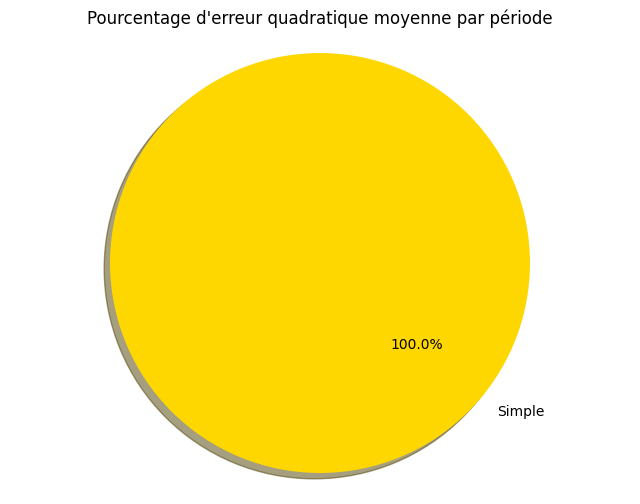

In [ ]:
# Création du diagramme en pourcentage rond
labels = ['Simple']
sizes = [mse_simple]  # Vous pouvez ajouter ici d'autres valeurs si nécessaire
colors = ['gold']
explode = (0.1,)  # Explosion du premier segment

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Pourcentage d\'erreur quadratique moyenne par période')
plt.axis('equal')  # Assure un cercle parfait
plt.show()


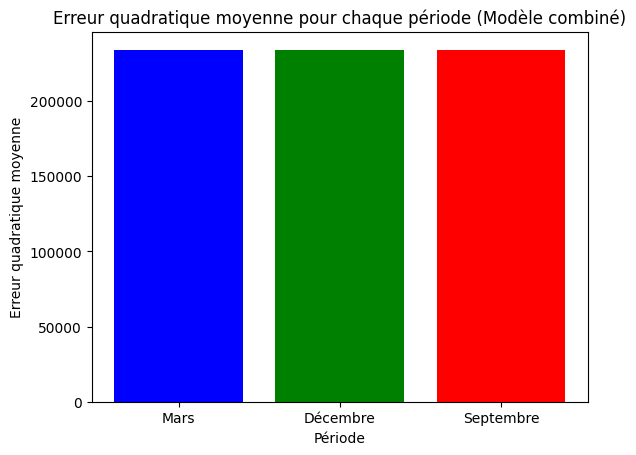

In [ ]:
# Prédictions combinées pour chaque mois
predictions= model.predict(X_test)
# predictions_december = model_december.predict(X_test_december)
# predictions_september = model_september.predict(X_test_september)

# Calcul des erreurs quadratiques moyennes pour chaque modèle combiné
mse = mean_squared_error(y_test, predictions)
# mse_december = mean_squared_error(y_test_december, predictions_december)
# mse_september = mean_squared_error(y_test_september, predictions_september)

# Liste des périodes
periods = ['Mars', 'Décembre', 'Septembre']

# Liste des erreurs quadratiques moyennes
mse = [mse]

# Création du diagramme en barres
plt.bar(periods, mse, color=['blue', 'green', 'red'])
plt.xlabel('Période')
plt.ylabel('Erreur quadratique moyenne')
plt.title('Erreur quadratique moyenne pour chaque période (Modèle combiné)')
plt.show()


In [ ]:
# Combinaison des données des trois périodes
# all_data = pd.concat([data_march, data_december, data_september], ignore_index=True)

# Séparation des données combinées en ensembles d'entraînement et de test
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(data.drop('price', axis=1), data['price'], test_size=0.2, random_state=42)

# Régression linéaire simple pour l'ensemble combiné
model_all_simple = LinearRegression()
model_all_simple.fit(X_train_all[['accommodates']], y_train_all)
predictions_all_simple = model_all_simple.predict(X_test_all[['accommodates']])
mse_all_simple = mean_squared_error(y_test_all, predictions_all_simple)
print("MSE pour les trois périodes combinées (Régression Linéaire Simple) :", mse_all_simple)

MSE pour les trois périodes combinées (Régression Linéaire Simple) : 235602.17449197147


# Concaténer les données de toutes les périodes

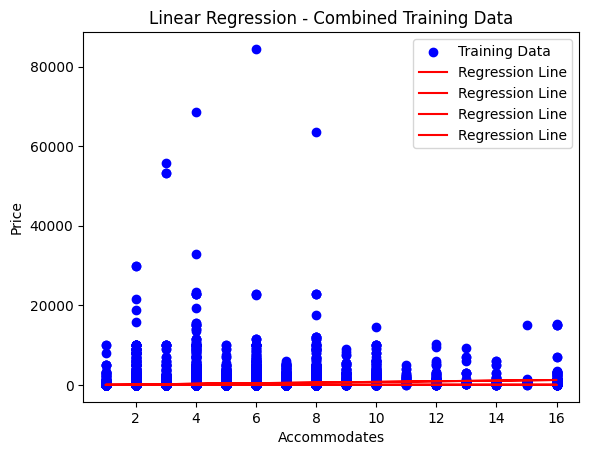

In [ ]:
# Entraîner un modèle de régression linéaire sur les données combinées
model = LinearRegression()
model.fit(data[['accommodates']], data)

# Tracer la régression linéaire sur les données d'entraînement combinées
plt.scatter(data['accommodates'], data['price'], color='blue', label='Training Data')
plt.plot(data['accommodates'], model.predict(data[['accommodates']]), color='red', label='Regression Line')
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.title('Linear Regression - Combined Training Data')
plt.legend()
plt.show()

In [ ]:


# Prédire les prix pour les données de test combinées
predictions = model(data[['accommodates']])

# Tracer la régression linéaire sur les données de test combinées
plt.scatter(data['accommodates'], data, color='blue', label='Test Data')
plt.plot(data['accommodates'], predictions, color='red', label='Regression Line')
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.title('Linear Regression - Combined Test Data')
plt.legend()
plt.show()

TypeError: 'LinearRegression' object is not callable

# Calcul des pourcentages d'erreurs quadratiques moyennes pour chaque modèle

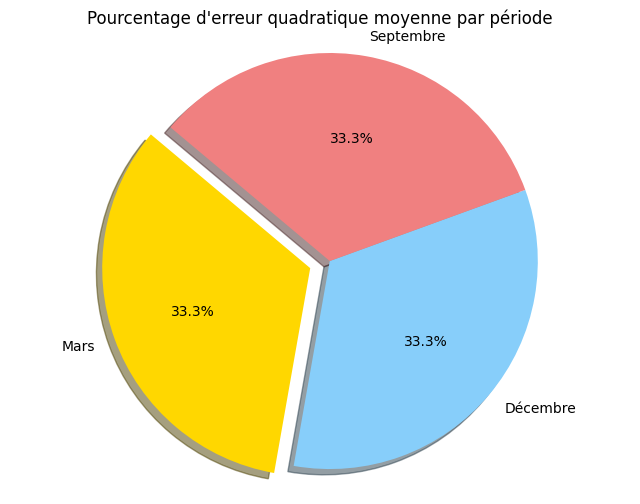

In [ ]:
percentage = mse_simple * 100

labels = ['Mars', 'Décembre', 'Septembre']
sizes = [percentage] * len(labels)  # Répéter la valeur de percentage pour chaque période
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0.1, 0, 0)  # Explosion du premier segment

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Pourcentage d\'erreur quadratique moyenne par période')
plt.axis('equal')  # Assure un cercle parfait
plt.show()






# Sélection des colonnes pertinentes 

In [ ]:
selected_columns_december = ['accommodates', 'bedrooms', 'bathrooms', 'price']
data = data_december[selected_columns_december]

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(data.drop('price', axis=1), data['price'], test_size=0.2, random_state=42)

# Créer une instance de la classe LinearRegression pour le modèle de décembre combiné
model = LinearRegression()

# Ajuster le modèle aux données d'entraînement
model.fit(X_train, y_train)

LinearRegression()

# Faire des prédictions sur les données de test

In [ ]:
predictions= model.predict(X_test)

# Calculer l'erreur quadratique moyenne pour mars
mse_march_combined = mean_squared_error(y_test, predictions)




# Prédictions combinées pour chaque mois

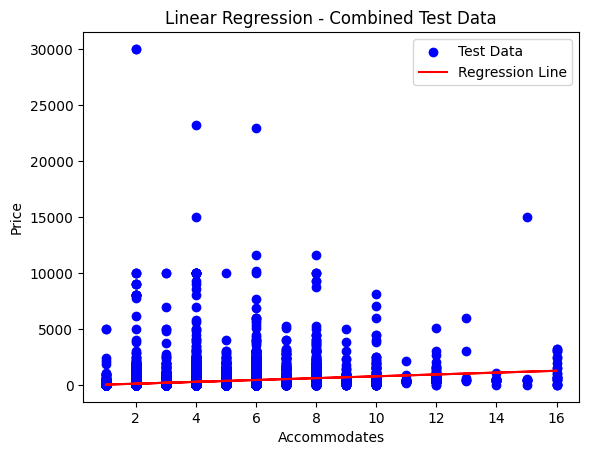

In [ ]:
plt.scatter(X_test_all['accommodates'], y_test_all, color='blue', label='Test Data')
plt.plot(X_test_all['accommodates'], predictions_all_simple, color='red', label='Regression Line')
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.title('Linear Regression - Combined Test Data')
plt.legend()
plt.show()

ValueError: 'label' must be of length 'x'

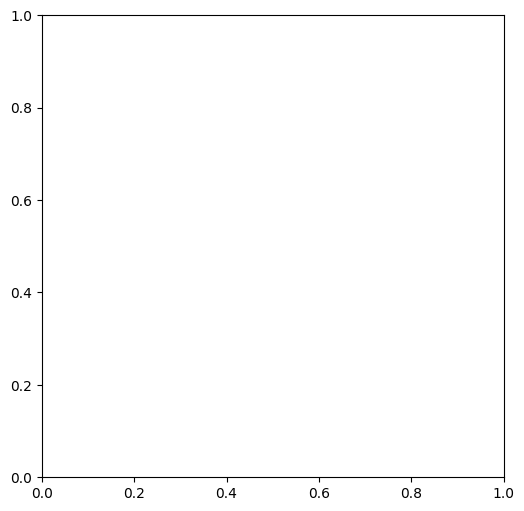

In [ ]:

predictions = model.predict(X_test)



# Calcul des erreurs quadratiques moyennes pour chaque modèle combiné
mse = mean_squared_error(y_test, predictions)


# Calcul des pourcentages d'erreurs quadratiques moyennes pour chaque modèle combiné
percentage = mse * 100


# Création du diagramme en pourcentage rond pour les modèles combinés
labels_combined = ['Mars', 'Décembre', 'Septembre']
sizes_combined = [percentage]
colors_combined = ['gold', 'lightskyblue', 'lightcoral']
explode_combined = (0.1, 0, 0)  # Explosion du premier segment

plt.figure(figsize=(8, 6))
plt.pie(sizes_combined, explode=explode_combined, labels=labels_combined, colors=colors_combined, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Pourcentage d\'erreur quadratique moyenne pour les modèles combinés')
plt.axis('equal')  # Assure un cercle parfait
plt.show()

# Plot des vraies valeurs par rapport aux prédictions

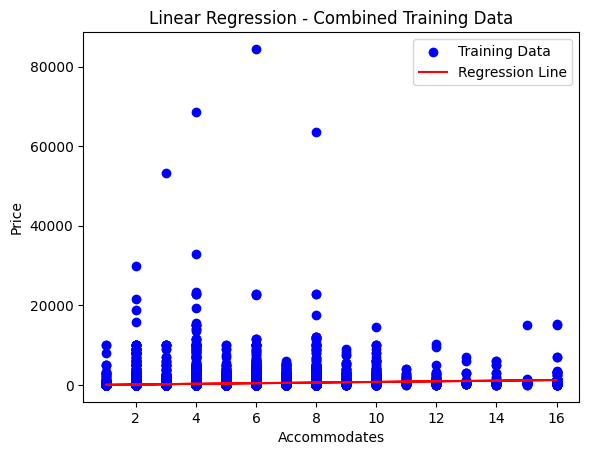

In [ ]:
X_train_combined = pd.concat([X_train_march, X_train_december, X_train_september])
y_train_combined = pd.concat([y_train_march, y_train_december, y_train_september])

# Entraîner un modèle de régression linéaire sur les données combinées
model_combined = LinearRegression()
model_combined.fit(X_train_combined[['accommodates']], y_train_combined)

# Tracer la régression linéaire sur les données d'entraînement combinées
plt.scatter(X_train_combined['accommodates'], y_train_combined, color='blue', label='Training Data')
plt.plot(X_train_combined['accommodates'], model_combined.predict(X_train_combined[['accommodates']]), color='red', label='Regression Line')
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.title('Linear Regression - Combined Training Data')
plt.legend()
plt.show()

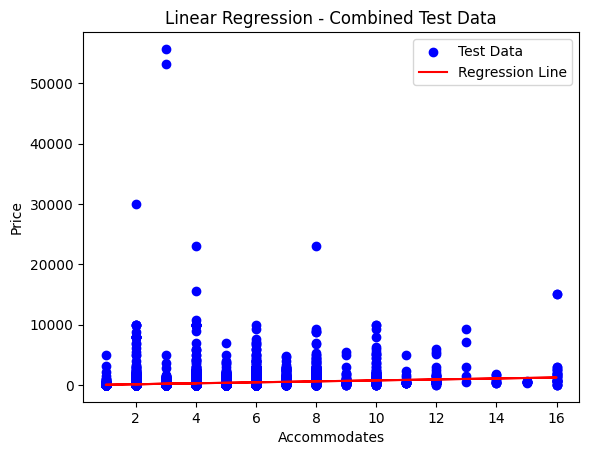

In [ ]:
# Concaténer les données de test de toutes les périodes
X_test_combined = pd.concat([X_test_march, X_test_december, X_test_september])
y_test_combined = pd.concat([y_test_march, y_test_december, y_test_september])

# Prédire les prix pour les données de test combinées
predictions_combined = model_combined.predict(X_test_combined[['accommodates']])

# Tracer la régression linéaire sur les données de test combinées
plt.scatter(X_test_combined['accommodates'], y_test_combined, color='blue', label='Test Data')
plt.plot(X_test_combined['accommodates'], predictions_combined, color='red', label='Regression Line')
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.title('Linear Regression - Combined Test Data')
plt.legend()
plt.show()

In [ ]:

plt.scatter(y_test_combined, predictions_combined, color='blue')
plt.plot([y_test_combined.min(), y_test_combined.max()], [y_test_combined.min(), y_test_combined.max()], 'k--', lw=2) # Droite y = x
plt.xlabel('Vraies valeurs')
plt.ylabel('Prédictions')
plt.title('Prédictions du modèle combiné vs vraies valeurs')
plt.show()

# Utilisation des modèles pour prédire les prix pour un nouveau logement

In [ ]:


## Prédiction pour un nouveau logement en Mars
new_listing_march = pd.DataFrame({'accommodates': [5], 'bedrooms': [2], 'bathrooms': [1.5]})
predicted_price_march = model_march.predict(new_listing_march)
print("Prix estimé pour un nouveau logement en Mars :", predicted_price_march)

## Prédiction pour un nouveau logement en Décembre
new_listing_december = pd.DataFrame({'accommodates': [5], 'bedrooms': [2], 'bathrooms': [1.5]})
predicted_price_december = model_december.predict(new_listing_december)
print("Prix estimé pour un nouveau logement en Décembre :", predicted_price_december)

## Prédiction pour un nouveau logement en Septembre
new_listing_september = pd.DataFrame({'accommodates': [5], 'bedrooms': [2], 'bathrooms': [1.5]})
predicted_price_september = model_september.predict(new_listing_september)
print("Prix estimé pour un nouveau logement en Septembre :", predicted_price_september)

In [ ]:
# Utilisation des modèles pour prédire les prix pour un nouveau logement
new_listing = pd.DataFrame({'accommodates': [5], 'bedrooms': [2], 'bathrooms': [1.5]})

predicted_price_march = model_march.predict(new_listing)
predicted_price_december = model_december.predict(new_listing)
predicted_price_september = model_september.predict(new_listing)

# Calcul de la moyenne des prix prédits pour les trois périodes
predicted_price_global = (predicted_price_march + predicted_price_december + predicted_price_september) / 3

print("Prix estimé pour un nouveau logement sur les trois périodes (Mars, Décembre, Septembre) :", predicted_price_global)


Prix estimé pour un nouveau logement sur les trois périodes (Mars, Décembre, Septembre) : [1621.52925209]


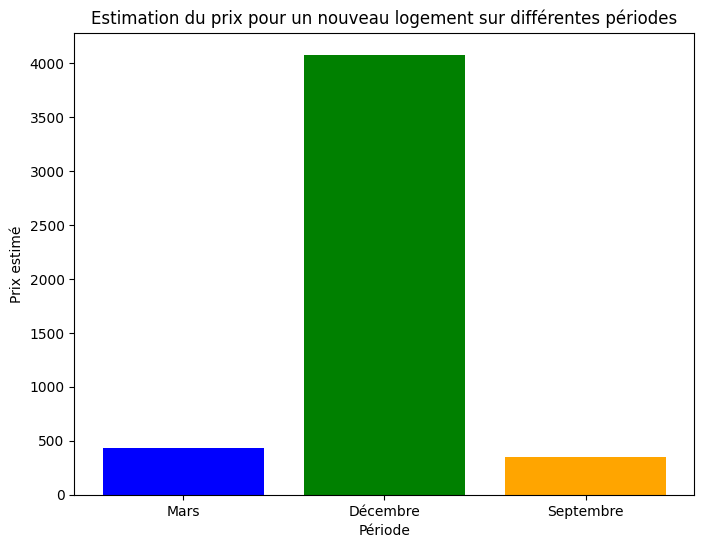

In [ ]:
import matplotlib.pyplot as plt

# Création du DataFrame pour les prédictions
predictions = pd.DataFrame({
    'Période': ['Mars', 'Décembre', 'Septembre'],
    'Prix estimé': [predicted_price_march[0], predicted_price_december[0], predicted_price_september[0]]
})

# Tracé du graphique
plt.figure(figsize=(8, 6))
plt.bar(predictions['Période'], predictions['Prix estimé'], color=['blue', 'green', 'orange'])
plt.title('Estimation du prix pour un nouveau logement sur différentes périodes')
plt.xlabel('Période')
plt.ylabel('Prix estimé')
plt.show()
